In [2]:
using CSV
using Plots
using DataFrames

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
mutable struct data
    df::DataFrame
    ptx::Float32
    pty::Float32
    ptz::Float32
end

In [4]:
ogs5_THM=Array{data}(undef, 3)

3-element Array{data,1}:
 #undef
 #undef
 #undef

## Read in OGS5 data, tuple defines all four observation points

measurement points:

In [5]:
pt1=[4.593,32.966,2.517]
pt2=[7.142,32.588,4.287]
pt3=[11.66,32.765,8.508]

3-element Array{Float64,1}:
 11.66
 32.765
  8.508

In [6]:
measurements_press=CSV.read("1_Interval Pressures BFEA002to007_PRE_01-06.csv");
measurements_temp=CSV.read("2_Temperatures BFEA002to007_PRE_01-06.csv");

In [7]:
exp_press = measurements_press[1941:end,:]

,BFEA002_PRE_01_time,BFEA002_PRE_01,BFEA002_PRE_02,BFEA002_PRE_03,BFEA002_PRE_04
,String,Float64?,Float64?,Float64?,Float64?
1,01.11.2014 00:00,1139.34,1095.81,831.967,566.415
2,01.11.2014 12:00,1139.09,1095.64,831.815,566.348
3,03.11.2014 00:00,1137.89,1094.52,830.887,565.81
4,03.11.2014 12:00,1137.28,1093.99,830.36,565.447
5,04.11.2014 00:00,1136.32,1093.04,829.452,564.654
6,04.11.2014 12:00,1135.94,1092.74,829.217,564.555
7,05.11.2014 00:00,1135.93,1092.83,829.388,564.852
8,05.11.2014 12:00,1136.33,1093.34,829.972,565.569
9,06.11.2014 00:00,1136.55,1093.63,830.34,565.996


In [8]:
exp_temp = measurements_temp[2040:end,:]

,Time (12h av),BFEA002_TEM_01,BFEA002_TEM_02,BFEA002_TEM_03,BFEA002_TEM_04
,String,Float64?,Float64?,Float64?,Float64?
1,01.11.2014 00:00,16.9423,16.979,17.0702,17.0957
2,01.11.2014 12:00,16.9491,16.9686,17.0809,17.0888
3,03.11.2014 00:00,16.9429,16.9618,17.0824,17.09
4,03.11.2014 12:00,16.9603,16.9598,17.0774,17.0856
5,04.11.2014 00:00,16.9578,16.9616,17.0777,17.0979
6,04.11.2014 12:00,16.942,16.9784,17.0896,17.0905
7,05.11.2014 00:00,16.9632,16.9733,17.0835,17.0956
8,05.11.2014 12:00,16.9522,16.9623,17.0876,17.0986
9,06.11.2014 00:00,16.9616,16.9748,17.0849,17.0939


In [9]:
exp_press[:time] = collect(1:length(exp_press[:,1]))*60*60*12

3170-element Array{Int64,1}:
     43200
     86400
    129600
    172800
    216000
    259200
    302400
    345600
    388800
    432000
    475200
    518400
    561600
         ⋮
 136468800
 136512000
 136555200
 136598400
 136641600
 136684800
 136728000
 136771200
 136814400
 136857600
 136900800
 136944000

In [10]:
exp_temp[:time] = collect(1:length(exp_temp[:,1]))*60*60*12

3169-element Array{Int64,1}:
     43200
     86400
    129600
    172800
    216000
    259200
    302400
    345600
    388800
    432000
    475200
    518400
    561600
         ⋮
 136425600
 136468800
 136512000
 136555200
 136598400
 136641600
 136684800
 136728000
 136771200
 136814400
 136857600
 136900800

In [11]:
ogs5_THM[1]=data(CSV.read("ogs5_heat_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs5_THM[2]=data(CSV.read("ogs5_heat_BFEA003.csv"),pt2[1],pt2[2],pt2[3]);
ogs5_THM[3]=data(CSV.read("ogs5_heat_BFEA004.csv"),pt3[1],pt3[2],pt3[3]);

In [12]:
for i in 1:3
    insert!(ogs5_THM[i].df, 3, ogs5_THM[i].df[:Time]*24*60*60, :Time_s)
end

In [13]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_richards_BFEA002.csv")["avg(PRESSURE1)"], :pressure );
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_richards_BFEA003.csv")["avg(PRESSURE1)"], :pressure );
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_richards_BFEA004.csv")["avg(PRESSURE1)"], :pressure );

# Temp/Press OGS5 THM (richards) output, 3 points vs time in s

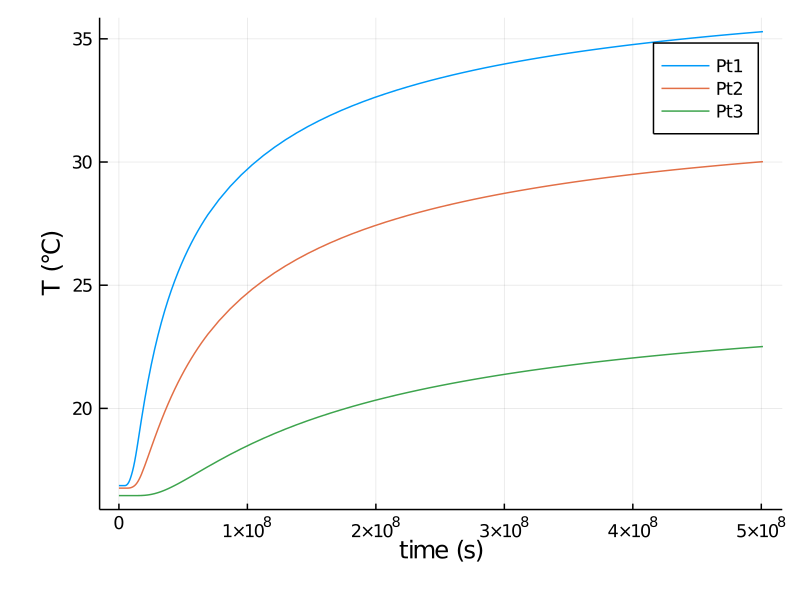

In [17]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="Pt2")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="Pt3")
xlabel!("time (s)")
ylabel!("T (°C)")

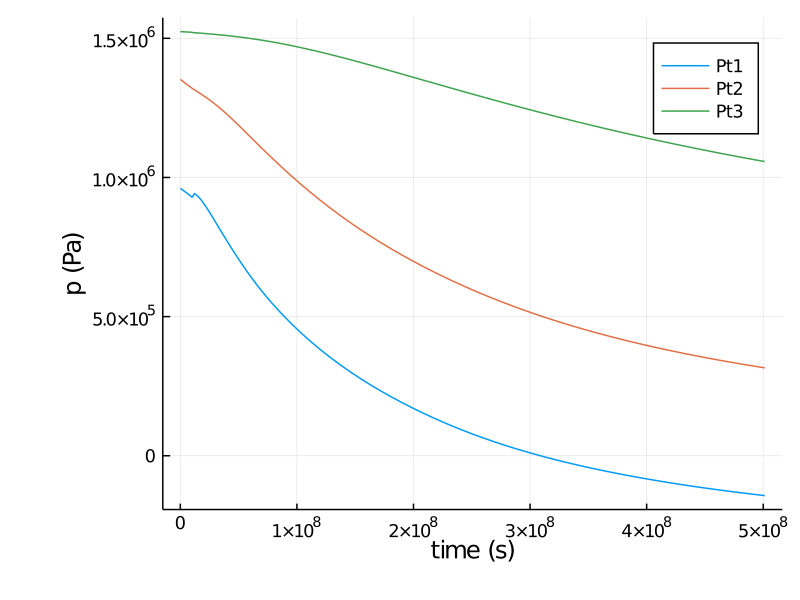

In [18]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[2].df["Time_s"],ogs5_THM[2].df[:pressure], label="Pt2")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[3].df[:pressure], label="Pt3")
xlabel!("time (s)")
ylabel!("p (Pa)")

# FE-exp OGS5 THM richards vs THM sat anisotropic elastic

In [36]:
ogs6_HTm1=Array{data}(undef, 4)
ogs6_THM=Array{data}(undef, 4)
ogs6_HTm2=Array{data}(undef, 4)
ogs6_HTm2_aniso=Array{data}(undef, 4)

4-element Array{data,1}:
 #undef
 #undef
 #undef
 #undef

In [21]:
ogs6_THM_bctest=Array{data}(undef, 3)
ogs6_THM_biottest=Array{data}(undef, 3)

3-element Array{data,1}:
 #undef
 #undef
 #undef

In [22]:
ogs6_THM_bctest[1]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_THM_bctest[2]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_THM_bctest[3]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);
ogs6_THM_biottest[1]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_THM_biottest[2]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_THM_biottest[3]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);

In [38]:
ogs6_THM[1]=data(CSV.read("ogs6_THM_anisoelastic_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_THM[2]=data(CSV.read("ogs6_THM_anisoelastic_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_THM[3]=data(CSV.read("ogs6_THM_anisoelastic_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);
ogs6_HTm1[1]=data(CSV.read("ogs6_HTm1_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_HTm1[2]=data(CSV.read("ogs6_HTm1_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_HTm1[3]=data(CSV.read("ogs6_HTm1_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);
ogs6_HTm2[1]=data(CSV.read("ogs6_HTm2_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_HTm2[2]=data(CSV.read("ogs6_HTm2_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_HTm2[3]=data(CSV.read("ogs6_HTm2_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);
ogs6_HTm2_aniso[1]=data(CSV.read("ogs6_HTm2_aniso_BFEA002.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_HTm2_aniso[2]=data(CSV.read("ogs6_HTm2_aniso_BFEA003.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_HTm2_aniso[3]=data(CSV.read("ogs6_HTm2_aniso_BFEA004.csv"),pt3[1],pt2[2],pt3[3]);

In [24]:
ogs6_THM_corr=Array{data}(undef, 4)

4-element Array{data,1}:
 #undef
 #undef
 #undef
 #undef

In [25]:
ogs6_THM_corr[1]=data(CSV.read("ogs6_THM_anisoelastic_BFEA002_corr.csv"),pt1[1],pt1[2],pt1[3]);
ogs6_THM_corr[2]=data(CSV.read("ogs6_THM_anisoelastic_BFEA003_corr.csv"),pt2[1],pt2[2],pt3[3]);
ogs6_THM_corr[3]=data(CSV.read("ogs6_THM_anisoelastic_BFEA004_corr.csv"),pt3[1],pt2[2],pt3[3]);

# PT1: Temperature

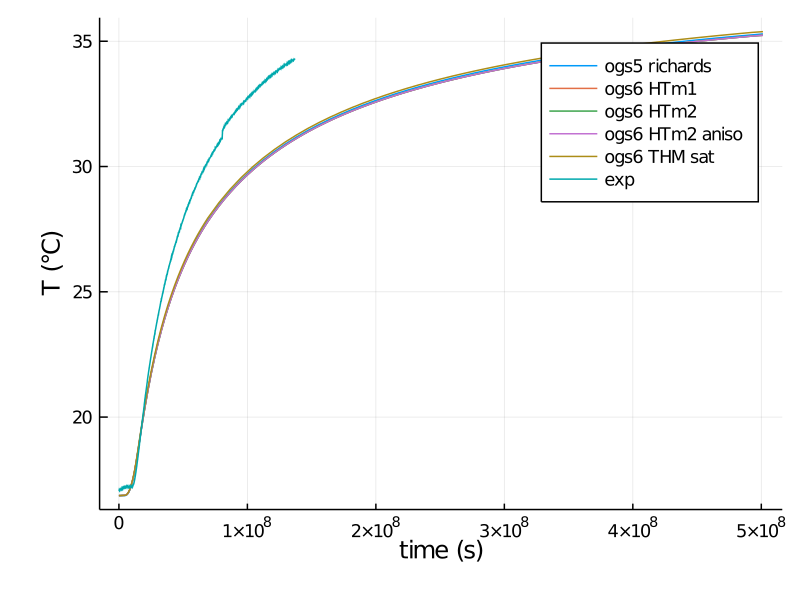

In [40]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="ogs5 richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[1].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[1].df["Time"],ogs6_HTm2[1].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_HTm2_aniso[1].df["Time"],ogs6_HTm2_aniso[1].df["avg(temperature)"], label="ogs6 HTm2 aniso")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA002_TEM_03"], label="exp")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT1: pressure

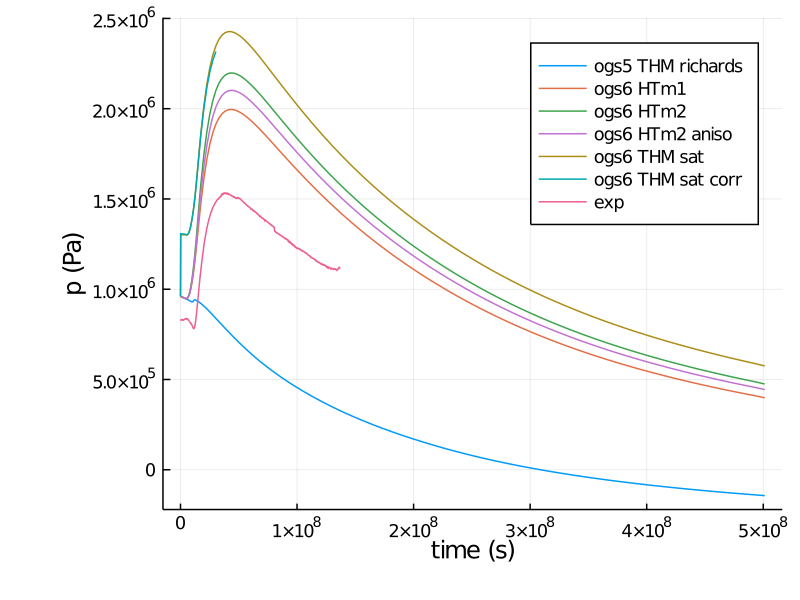

In [41]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[1].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[1].df["Time"],ogs6_HTm2[1].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_HTm2_aniso[1].df["Time"],ogs6_HTm2_aniso[1].df["avg(pressure)"], label="ogs6 HTm2 aniso")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(pressure)"], label="ogs6 THM sat")
plot!(ogs6_THM_corr[1].df["Time"],ogs6_THM_corr[1].df["avg(pressure)"], label="ogs6 THM sat corr")
plot!(exp_press[:,:time],exp_press[:,"BFEA002_PRE_03"]*1000, label="exp")
#plot!(ogs6_THM_bctest[1].df["Time"],ogs6_THM_bctest[1].df["avg(pressure)"], label="ogs6 THM sat bc test")
#plot!(ogs6_THM_biottest[1].df["Time"],ogs6_THM_biottest[1].df["avg(pressure)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT2: Temperature

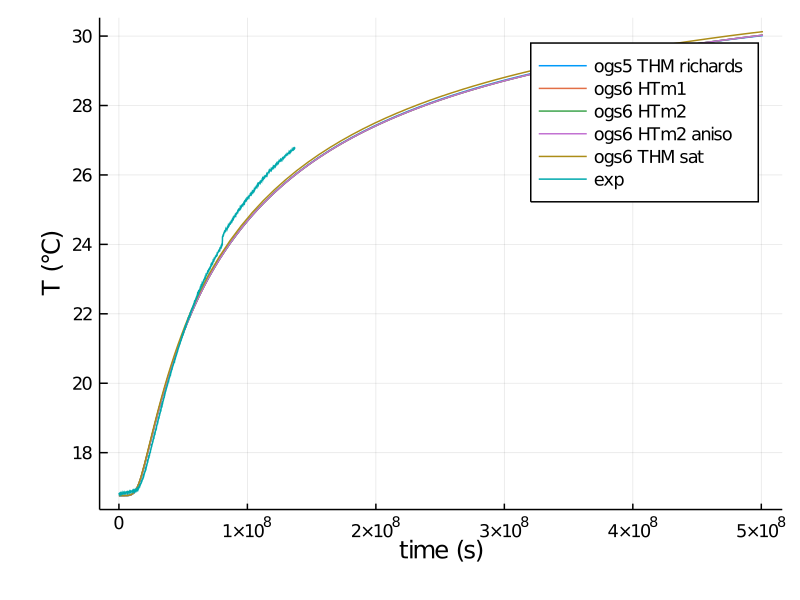

In [42]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[2].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[2].df["Time"],ogs6_HTm2[2].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_HTm2_aniso[2].df["Time"],ogs6_HTm2_aniso[2].df["avg(temperature)"], label="ogs6 HTm2 aniso")
plot!(ogs6_THM[2].df["Time"],ogs6_THM[2].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA003_TEM_03"], label="exp")
xlabel!("time (s)")
ylabel!("T (°C)")

In [35]:
savefig("temp_pt2.pdf")

# PT2: pressure

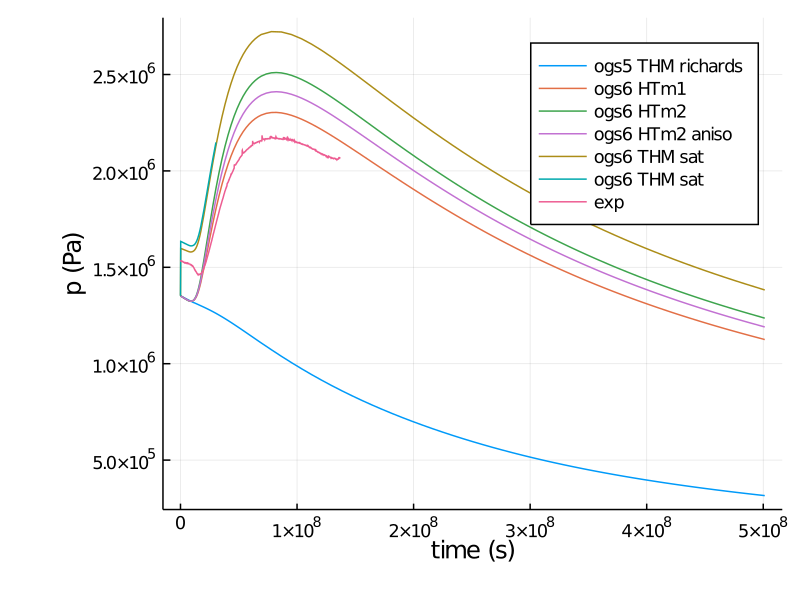

In [44]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[2].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[2].df["Time"],ogs6_HTm2[2].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_HTm2_aniso[2].df["Time"],ogs6_HTm2_aniso[2].df["avg(pressure)"], label="ogs6 HTm2 aniso")
plot!(ogs6_THM[2].df["Time"],ogs6_THM[2].df["avg(pressure)"], label="ogs6 THM sat")
plot!(ogs6_THM_corr[2].df["Time"],ogs6_THM_corr[2].df["avg(pressure)"], label="ogs6 THM sat")
plot!(exp_press[:,:time],exp_press[:,"BFEA003_PRE_03"]*1000, label="exp")
#plot!(ogs6_THM_bctest[2].df["Time"],ogs6_THM_bctest[2].df["avg(pressure)"], label="ogs6 THM sat bc test")
#plot!(ogs6_THM_biottest[2].df["Time"],ogs6_THM_biottest[2].df["avg(pressure)"], label="ogs6 THM sat biot test")

xlabel!("time (s)")
ylabel!("p (Pa)")


In [37]:
savefig("press_pt2.pdf")

# PT3: Temperature

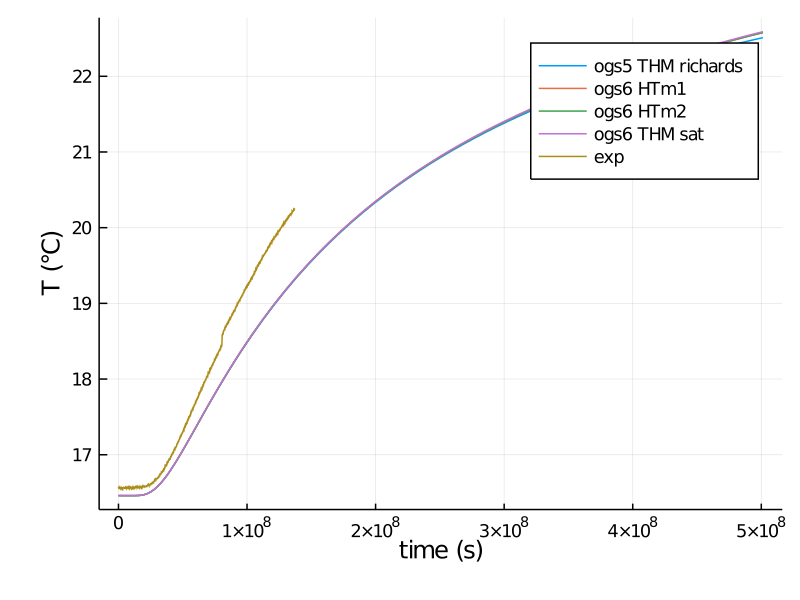

In [31]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[3].df["Time"],ogs6_HTm1[3].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[3].df["Time"],ogs6_HTm2[3].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA004_TEM_03"], label="exp")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT3: pressure

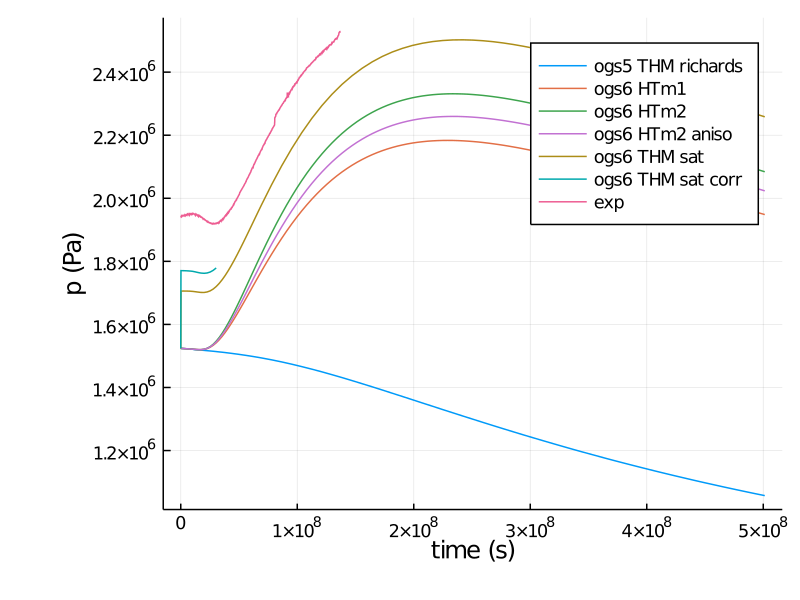

In [46]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[3].df["Time"],ogs6_HTm1[3].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[3].df["Time"],ogs6_HTm2[3].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_HTm2_aniso[3].df["Time"],ogs6_HTm2_aniso[3].df["avg(pressure)"], label="ogs6 HTm2 aniso")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(pressure)"], label="ogs6 THM sat")
plot!(ogs6_THM_corr[1].df["Time"],ogs6_THM_corr[3].df["avg(pressure)"], label="ogs6 THM sat corr")
plot!(exp_press[:,:time],exp_press[:,"BFEA004_PRE_03"]*1000, label="exp")
#plot!(ogs6_THM_bctest[3].df["Time"],ogs6_THM_bctest[3].df["avg(pressure)"], label="ogs6 THM sat bc test")
#plot!(ogs6_THM_biottest[3].df["Time"],ogs6_THM_biottest[3].df["avg(pressure)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("p (Pa)")